In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
from pandas import read_csv

In [46]:
data = pd.read_csv('C:/Users/Abhi/Desktop/CSV files/Housing.csv')
data.head()

,Column2,Column4,Column7,Column9,Column11,Column13,Column15,Column17,Column20,Column22,Column24,Column25,Column28,Column30
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24.0
1,0.02731,0.0,0.00,0,0.000,0.000,0.0,0.00,0,0,0.0,17.8,0.00,0.0
2,0.02729,0.0,0.00,0,0.000,0.000,0.0,0.00,0,0,0.0,17.8,0.00,0.0
3,0.03237,0.0,0.00,0,0.000,0.000,0.0,0.00,0,0,0.0,18.7,0.00,0.0
4,0.06905,0.0,0.00,0,0.000,0.000,0.0,0.00,0,0,0.0,18.7,0.00,0.0


In [47]:
# Here the data has no column names, so firstly we assign the column names
feature_names = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']
data.columns = feature_names
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24.0
1,0.02731,0.0,0.00,0,0.000,0.000,0.0,0.00,0,0,0.0,17.8,0.00,0.0
2,0.02729,0.0,0.00,0,0.000,0.000,0.0,0.00,0,0,0.0,17.8,0.00,0.0
3,0.03237,0.0,0.00,0,0.000,0.000,0.0,0.00,0,0,0.0,18.7,0.00,0.0
4,0.06905,0.0,0.00,0,0.000,0.000,0.0,0.00,0,0,0.0,18.7,0.00,0.0


In [48]:
data.shape

(506, 14)

In [49]:
# Rename the MEDV by the name price
data = data.rename(columns={'MEDV':'PRICE'})
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24.0
1,0.02731,0.0,0.00,0,0.000,0.000,0.0,0.00,0,0,0.0,17.8,0.00,0.0
2,0.02729,0.0,0.00,0,0.000,0.000,0.0,0.00,0,0,0.0,17.8,0.00,0.0
3,0.03237,0.0,0.00,0,0.000,0.000,0.0,0.00,0,0,0.0,18.7,0.00,0.0
4,0.06905,0.0,0.00,0,0.000,0.000,0.0,0.00,0,0,0.0,18.7,0.00,0.0


In [50]:
X = data.drop('PRICE', axis = 1)
y = data['PRICE']

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state=42)


In [53]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(X_train)
X_train_scaled = sc.transform(X_train)
X_test_scaled = sc.transform(X_test)

In [54]:
from keras.models import Sequential
from keras.layers import Dense

In [55]:
model = Sequential()
model.add(Dense(128, input_dim=13, activation= 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))

In [56]:
model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics = ['mae'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 128)               1792      
_________________________________________________________________
dense_6 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 65        
Total params: 10,113
Trainable params: 10,113
Non-trainable params: 0
_________________________________________________________________


In [57]:
history = model.fit(X_train_scaled, y_train, validation_split = 0.2, epochs = 100)

Epoch 1/100
11/11 [==============================] - 0s 25ms/step - loss: 265.9288 - mae: 9.4742 - val_loss: 284.9548 - val_mae: 10.6911
Epoch 2/100
11/11 [==============================] - 0s 5ms/step - loss: 245.6456 - mae: 9.6090 - val_loss: 264.2465 - val_mae: 10.7374
Epoch 3/100
11/11 [==============================] - 0s 5ms/step - loss: 225.6532 - mae: 9.7000 - val_loss: 238.9209 - val_mae: 10.6442
Epoch 4/100
11/11 [==============================] - 0s 5ms/step - loss: 199.1402 - mae: 9.6173 - val_loss: 206.9938 - val_mae: 10.3020
Epoch 5/100
11/11 [==============================] - 0s 5ms/step - loss: 168.7156 - mae: 9.3073 - val_loss: 171.4785 - val_mae: 9.7049
Epoch 6/100
11/11 [==============================] - 0s 5ms/step - loss: 138.4470 - mae: 8.8474 - val_loss: 138.0791 - val_mae: 8.8899
Epoch 7/100
11/11 [==============================] - 0s 6ms/step - loss: 112.3849 - mae: 8.0584 - val_loss: 112.4877 - val_mae: 7.9817
Epoch 8/100
11/11 [==============================]

Epoch 62/100
11/11 [==============================] - 0s 6ms/step - loss: 25.5713 - mae: 2.7699 - val_loss: 28.7353 - val_mae: 3.0592
Epoch 63/100
11/11 [==============================] - 0s 5ms/step - loss: 25.7972 - mae: 3.0637 - val_loss: 28.3081 - val_mae: 3.0358
Epoch 64/100
11/11 [==============================] - 0s 5ms/step - loss: 24.2936 - mae: 2.7955 - val_loss: 26.9443 - val_mae: 2.8657
Epoch 65/100
11/11 [==============================] - 0s 5ms/step - loss: 24.8876 - mae: 2.7671 - val_loss: 28.0995 - val_mae: 3.0209
Epoch 66/100
11/11 [==============================] - 0s 4ms/step - loss: 23.8588 - mae: 2.8595 - val_loss: 28.4934 - val_mae: 3.0583
Epoch 67/100
11/11 [==============================] - 0s 4ms/step - loss: 24.3295 - mae: 2.9135 - val_loss: 28.8493 - val_mae: 3.0779
Epoch 68/100
11/11 [==============================] - 0s 5ms/step - loss: 23.6082 - mae: 2.7349 - val_loss: 26.8809 - val_mae: 2.8898
Epoch 69/100
11/11 [==============================] - 0s 4ms/s

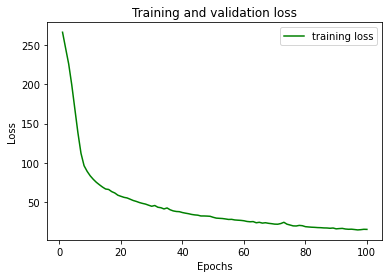

In [65]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'g', label = 'training loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

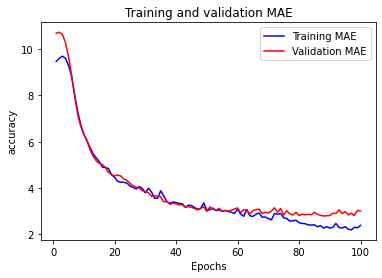

In [64]:
acc = history.history['mae']
val_acc = history.history['val_mae']
plt.plot(epochs, acc, 'b', label = 'Training MAE')
plt.plot(epochs, val_acc, 'r', label = 'Validation MAE')
plt.title('Training and validation MAE')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [62]:
# Prediction on test data 
prediction = model.predict(X_train_scaled[:5])
print('Predicted values are :', prediction)
print('Real values are : ', y_train[:5])


Predicted values are : [[ 0.19014609]
 [-0.51450086]
 [23.312452  ]
 [12.107477  ]
 [20.361053  ]]
Real values are :  477     0.0
15      0.0
332    19.4
423    13.4
19     18.2
Name: PRICE, dtype: float64
